## Data analysis
In this phase, I explore and analyse the features in the dataset.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Load dataset

In [2]:
df = pd.read_csv("../data/clean-dataset.csv")

# separate features (X) and target (y)
X = df.drop(columns=['is_promoted'])
y = df['is_promoted']

In [3]:
df.head()

,age,gender,department,education,tenure_years,previous_rating,kpi_met,trainings_attended,avg_training_score,awards_won,job_level,region,recruitment_channel,work_type,language_count,multilingual,international_hire,is_promoted
0,0.851187,1.0,2.0,2.0,0.854043,3.0,-0.548828,3.528853,0.387550,-0.707591,3.0,2.0,2.0,0.0,-0.903567,1.0,0.0,0
1,-0.430142,0.0,3.0,0.0,-0.439257,0.0,-1.596033,-1.405423,-1.118994,-0.707591,2.0,2.0,1.0,1.0,-0.903567,1.0,0.0,0
2,-1.070807,1.0,1.0,0.0,-0.751797,3.0,0.789267,-1.405423,0.893637,0.679298,0.0,3.0,0.0,0.0,1.859634,0.0,0.0,1
3,0.118999,1.0,2.0,0.0,-0.916359,3.0,-0.141582,-1.405423,0.126405,0.679298,1.0,1.0,1.0,0.0,0.478034,1.0,0.0,1
4,-0.064048,0.0,3.0,2.0,-0.455064,0.0,-0.316116,-1.405423,1.485745,0.679298,1.0,1.0,0.0,0.0,0.478034,0.0,1.0,0


### Statistics

In [4]:
# feature summary or statistical  analysis
df.describe()

,age,gender,department,education,tenure_years,previous_rating,kpi_met,trainings_attended,avg_training_score,awards_won,job_level,region,recruitment_channel,work_type,language_count,multilingual,international_hire,is_promoted
count,5.000000e+03,5000.00000,5000.000000,5000.000000,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.00000,5.000000e+03,5000.000000,5000.000000,5000.00000
mean,-1.918465e-17,0.49680,1.988600,0.897800,-1.492140e-17,2.361400,2.415845e-17,7.105427e-19,1.136868e-17,1.037392e-16,1.308000,1.503200,1.004200,0.24540,-7.744916e-17,0.511000,0.260400,0.23420
std,1.000100e+00,0.50004,1.420026,0.997374,1.000100e+00,0.970659,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.151782,1.119929,0.812843,0.52653,1.000100e+00,0.499929,0.438897,0.42354
min,-1.711471e+00,0.00000,0.000000,0.000000,-9.748167e-01,0.000000,-1.712390e+00,-1.405423e+00,-3.572413e+00,-7.075909e-01,0.000000,0.000000,0.000000,0.00000,-9.035666e-01,0.000000,0.000000,0.00000
25%,-8.877596e-01,0.00000,1.000000,0.000000,-7.196865e-01,2.000000,-8.397188e-01,-7.005262e-01,-6.666533e-01,-7.075909e-01,0.000000,1.000000,0.000000,0.00000,-9.035666e-01,0.000000,0.000000,0.00000
50%,2.747535e-02,0.00000,2.000000,0.000000,-3.090923e-01,2.000000,-2.522600e-02,4.370359e-03,-5.979672e-03,-7.075909e-01,1.000000,1.000000,1.000000,0.00000,4.780337e-01,1.000000,0.000000,0.00000
75%,8.511868e-01,1.00000,3.000000,2.000000,3.805816e-01,3.000000,8.474448e-01,7.092670e-01,6.915846e-01,6.792983e-01,2.000000,3.000000,2.000000,0.00000,4.780337e-01,1.000000,1.000000,0.00000
max,1.674898e+00,1.00000,4.000000,3.000000,5.842138e+00,4.000000,1.720116e+00,5.643543e+00,2.027956e+00,4.839966e+00,4.000000,3.000000,2.000000,2.00000,1.859634e+00,1.000000,1.000000,1.00000


In [5]:
# unique target values
df['is_promoted'].unique()

array([0, 1])

In [6]:
# promoted - 1
# not promoted - 0
y.value_counts()

is_promoted
0    3829
1    1171
Name: count, dtype: int64

### Bar graph showing promotion distribution

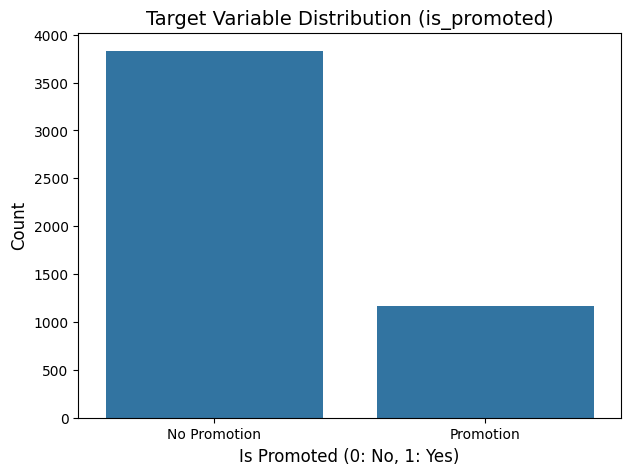

In [7]:
# Visualization of Imbalance
plt.figure(figsize=(7, 5))
sns.countplot(x='is_promoted', data=df)
plt.title(f'Target Variable Distribution (is_promoted)', fontsize=14)
plt.xlabel('Is Promoted (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Promotion', 'Promotion'])
plt.savefig(os.path.join("../", 'target_imbalance.png'))
plt.show()

There are a few thousands of promotions - "no promotion" dominates

### Visualize the key performance features
The practical and best attributes of an employee that showcase performance and experience.

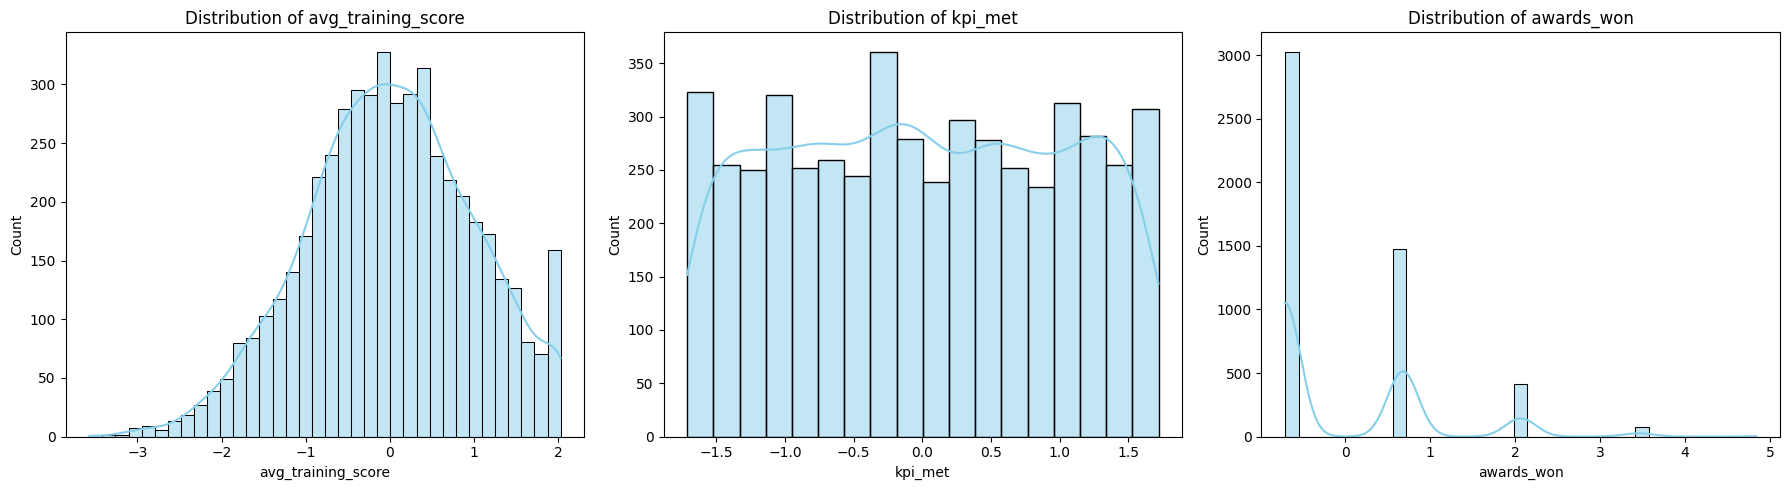

In [8]:
key_features = ['avg_training_score', 'kpi_met', 'awards_won']

# combine all plots on same space
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(key_features):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.savefig(os.path.join("../", 'key_features_distributions.png'))
plt.show()

Most employees have 0 awards. kpi_met and avg_training_score appear relatively normally distributed 